In [311]:
# MATERIAL ALLOY INVESTIGATION OF TEMPERATURE DEPENDENT PROPERTIES
# by Benjamin Long 12/4/2020

# Open-source software database from Berkeley Lab Commons 
# https://commons.lbl.gov/display/lbldiv/Material+Properties
# Utilizing the data from the ALS_Materials.xls database
# Data Created 06.13.2010/ Data Collected 12/2/2010

# Temperature Dependent Varibables will be broken into 3 categories; Mechanical, Thermal, and Electrical 
#     Mechanical: Elastic Modulus (E), Poisson Ratio (v), Yields Strength (YS), Ultimate Tensile Strength (UTS)
#     Thermal: Thermal Conductivity (K), Specific Heat (Cp)
#     Electrical: Electrical Resistivity (Ohm)
# *Density is also included as a misc. variable considered that is temperature-dependent

# These material properties are categorized into several alloy groups; Steel, Aluminum, Copper, and Titanium
# The datasets vary in size and number of test alloys within the databases stored as .csv files

In [312]:
# Importing necessary libraries for data visualization and manipulation
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats 
import math

In [313]:
db_Steel = pd.read_csv('C:/Users/blong/Documents/Ben/IBM/ML Week 2/Project 2/Steel.csv')
# db_Aluminum = pd.read_csv('C:/Users/blong/Documents/Ben/IBM/ML Week 2/Project 2/Aluminum.csv')
# db_Copper = pd.read_csv('C:/Users/blong/Documents/Ben/IBM/ML Week 2/Project 2/Copper.csv')
# db_Titanium = pd.read_csv('C:/Users/blong/Documents/Ben/IBM/ML Week 2/Project 2/Titanium.csv')
db_Steel.head()

,Kelvin,Celcius,Density,Elastic Modulus,Poisson Ratio,Yield Strength,Ultimate Tensile Strength,CTE,Thermal Conductivity,Specific Heat,Electrical Resistivity
0,5.0,-268.16,0.00001,208207.1455,0.27953,NaN,NaN,0.00001,0.00037,2.36086,0.00048
1,25.0,-248.16,0.00001,209690.1273,0.27865,673.65124,1709.79970,0.00001,0.00283,20.66104,0.00050
2,45.0,-228.16,0.00001,211173.1091,0.27777,591.32680,1662.38760,0.00001,0.00522,76.37376,0.00052
3,65.0,-208.16,0.00001,212330.2964,0.27739,529.43287,1617.91088,0.00001,0.00702,158.08830,0.00053
4,85.0,-188.16,0.00001,212096.3250,0.27823,483.95975,1558.90380,0.00001,0.00841,232.54021,0.00055


In [314]:
# Check for consistent and clean data throughout the input files. We can see from the Out[] in the above cell that
# there are some NaN values that have to be removed which are likely missing pieces of data that can be handled.
print(db_Steel.dtypes)
print(db_Steel.shape)
print(db_Steel.columns)

Kelvin                       float64
Celcius                      float64
Density                      float64
Elastic Modulus              float64
Poisson Ratio                float64
Yield Strength               float64
Ultimate Tensile Strength    float64
CTE                          float64
Thermal Conductivity         float64
Specific Heat                float64
Electrical Resistivity       float64
dtype: object
(356, 11)
Index(['Kelvin', 'Celcius', 'Density', 'Elastic Modulus', 'Poisson Ratio',
       'Yield Strength', 'Ultimate Tensile Strength', 'CTE',
       'Thermal Conductivity', 'Specific Heat', 'Electrical Resistivity'],
      dtype='object')


In [315]:
# Cleaning the data by removing the Celcius category because we only need one temperature range as our independent variable
# Also several variables are out of range and hard to grasp relative to the other data size ranges
db_Steel = db_Steel.drop(['Celcius'],axis=1) 
db_Steel['Density'] = db_Steel['Density']*1000000
db_Steel['CTE'] = db_Steel['CTE']*1000000
db_Steel

,Kelvin,Density,Elastic Modulus,Poisson Ratio,Yield Strength,Ultimate Tensile Strength,CTE,Thermal Conductivity,Specific Heat,Electrical Resistivity
0,5.00,10.0,208207.1455,0.27953,NaN,NaN,10.0,0.000370,2.36086,0.00048
1,25.00,10.0,209690.1273,0.27865,673.65124,1709.79970,10.0,0.002830,20.66104,0.00050
2,45.00,10.0,211173.1091,0.27777,591.32680,1662.38760,10.0,0.005220,76.37376,0.00052
3,65.00,10.0,212330.2964,0.27739,529.43287,1617.91088,10.0,0.007020,158.08830,0.00053
4,85.00,10.0,212096.3250,0.27823,483.95975,1558.90380,10.0,0.008410,232.54021,0.00055
...,...,...,...,...,...,...,...,...,...,...
351,1573.16,NaN,NaN,NaN,NaN,NaN,NaN,0.030482,NaN,NaN
352,1593.16,NaN,NaN,NaN,NaN,NaN,NaN,0.030692,NaN,NaN
353,1613.16,NaN,NaN,NaN,NaN,NaN,NaN,0.030898,NaN,NaN
354,1633.16,NaN,NaN,NaN,NaN,NaN,NaN,0.031101,NaN,NaN


In [316]:
# Group the data into its categorical variables of Mechanical, Thermal, and Electrical Properties
db_Steel_Mech = db_Steel.drop(['CTE','Thermal Conductivity','Specific Heat','Electrical Resistivity'],axis=1)
db_Steel_Therm = db_Steel.drop(['Elastic Modulus','Poisson Ratio','Yield Strength','Ultimate Tensile Strength','Electrical Resistivity'],axis=1)
db_Steel_Elec = db_Steel.drop(['CTE','Thermal Conductivity','Specific Heat','Elastic Modulus','Poisson Ratio','Yield Strength','Ultimate Tensile Strength'],axis=1)
db_Steel_Mech.shape, db_Steel_Therm.shape, db_Steel_Elec.shape

((356, 6), (356, 5), (356, 3))

In [317]:
# Remove all the data rows that do not contain float64 values for the necessary columns in each category
# this will reduce our data range but allow us to retain the information within the temperature ranges
# that ALL the data variables for that category were collected. We will then see if this temperature range
# is valid (large enough?) for our analysis
db_Steel_Mech.dropna(how='any',axis=0,inplace=True)
db_Steel_Therm.dropna(how='any',axis=0,inplace=True)
db_Steel_Elec.dropna(how='any',axis=0,inplace=True)
db_Steel_Mech.shape, db_Steel_Therm.shape, db_Steel_Elec.shape

((90, 6), (211, 5), (104, 3))

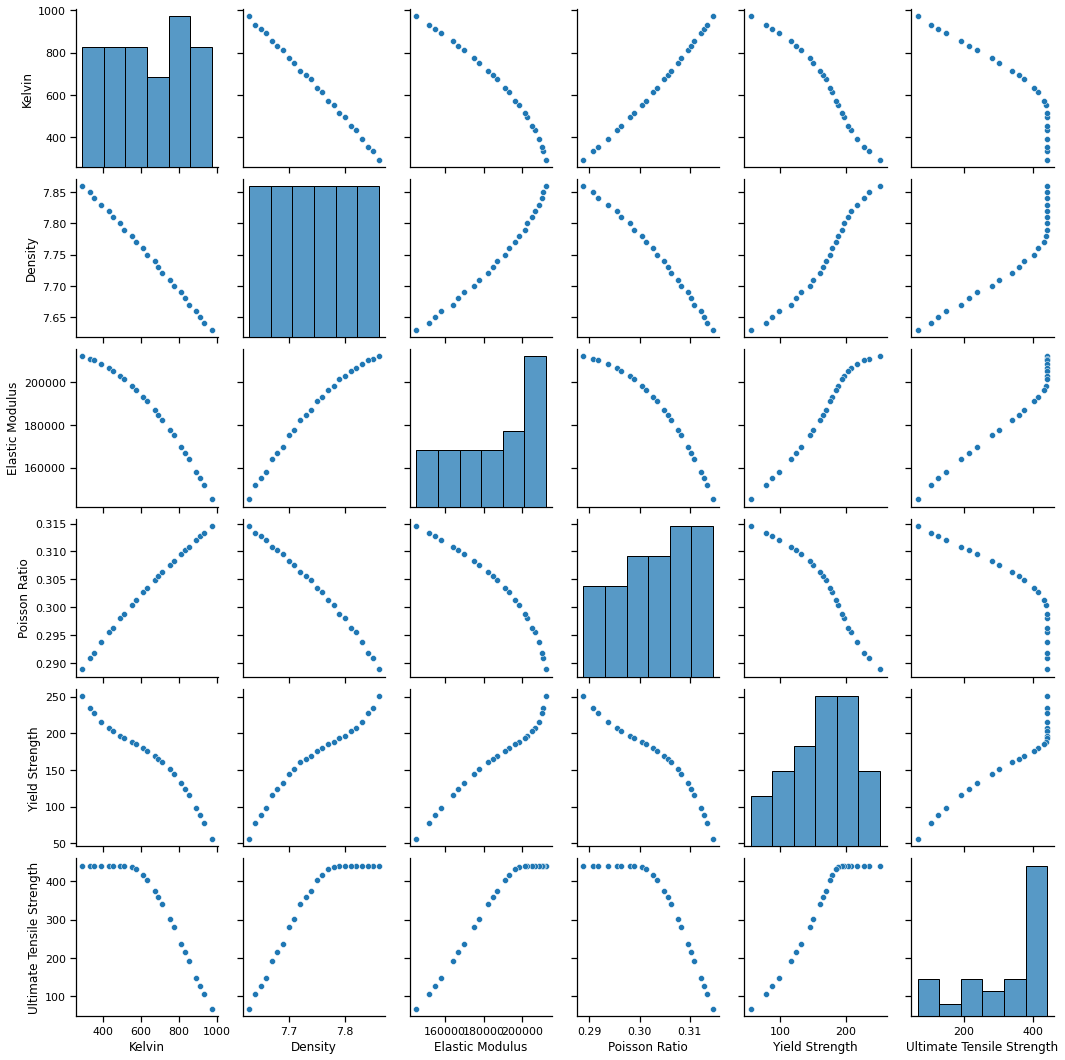

In [325]:
# Time to plot the data in Seaborn to look for any preliminary trends occuring or data resizing/shaping might need
# to be performed
sns.set_context('notebook')
sns.pairplot(db_Steel_Mech)

In [319]:
# There were a bunch of density values that look like they where repeated data that was miss entered, since this is
# a fairly important material property that affects all our features we will want to make sure
# we have a correct value for this data.
db_Steel_Mech=db_Steel_Mech.drop_duplicates(['Density'])
db_Steel_Mech=db_Steel_Mech.drop([1])
db_Steel_Mech.head()

,Kelvin,Density,Elastic Modulus,Poisson Ratio,Yield Strength,Ultimate Tensile Strength
135,293.16,7.86,212324.2469,0.288836,251.149523,441.573030
137,333.16,7.85,211089.7808,0.290829,234.349443,441.336645
138,353.16,7.84,210344.9643,0.291793,227.390800,441.218452
140,393.16,7.83,208600.1641,0.293663,215.845101,440.982067
142,433.16,7.82,206515.1412,0.295455,206.820610,440.745681


In [302]:
# It can be seen from the above graphs that if we can remove the outlier of the data then we can aquire more normal
# distributions that will help us analyse the data better with ML algorithims
from sklearn.preprocessing import RobustScaler
Trans=RobustScaler()
Steel=Trans.fit_transform(db_Steel_Mech)

<AxesSubplot:ylabel='Count'>

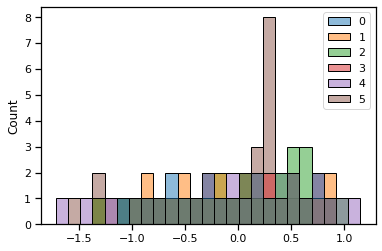

In [303]:
# Format the distributions and remove the outliers/arbitrary values located at the max and min of the dataset
# using Robust Scaler Transform
sns.histplot(Steel,bins=25,alpha=0.5)

In [321]:
# This dataset, albet small from our data cleaning, can be improved upon now that a formal method of processing the
# outliers and relevant information into statisicial distributions of the feature variables keeping in mind that these
# are all temperature dependent.
# Finally by changing the dataframe name from Mech to Therm, and Elec, the differenet catagories of material data can
# be investigated independent of one another.
stats_db = db_Steel_Mech.describe()
stats_db

,Kelvin,Density,Elastic Modulus,Poisson Ratio,Yield Strength,Ultimate Tensile Strength
count,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,643.993333,7.745000,185589.766533,0.303238,164.272803,331.865206
std,205.741853,0.070711,20821.102954,0.007698,51.215160,127.757619
min,293.160000,7.630000,145068.033700,0.288836,55.743076,65.879264
25%,483.160000,7.687500,169042.277500,0.297590,129.961227,231.421493
50%,653.160000,7.745000,188923.506450,0.304159,172.726920,389.915612
75%,818.160000,7.802500,203398.528550,0.309754,198.094785,440.450199
max,973.160000,7.860000,212324.246900,0.314604,251.149523,441.573030


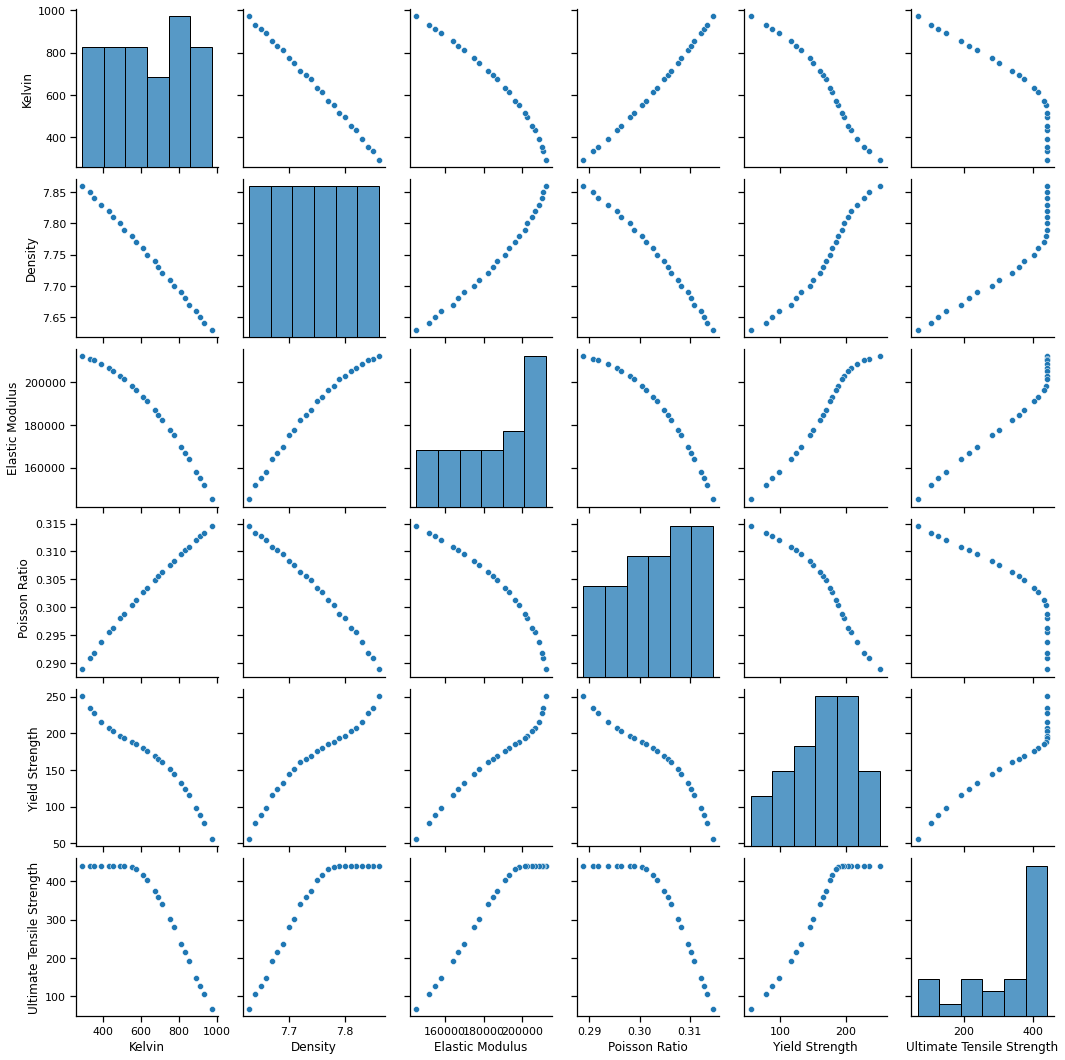

In [325]:
# It can be seen from the filtered data that several linear parametric trend lines occur between several of the variables
# that should help train the model. Other features show a logarithmic or exponential scaling to their correlation. It will 
# have to be determined whether this is because of our small sample size or something that the model should take into account
sns.set_context('notebook')
sns.pairplot(db_Steel_Mech)

<AxesSubplot:>

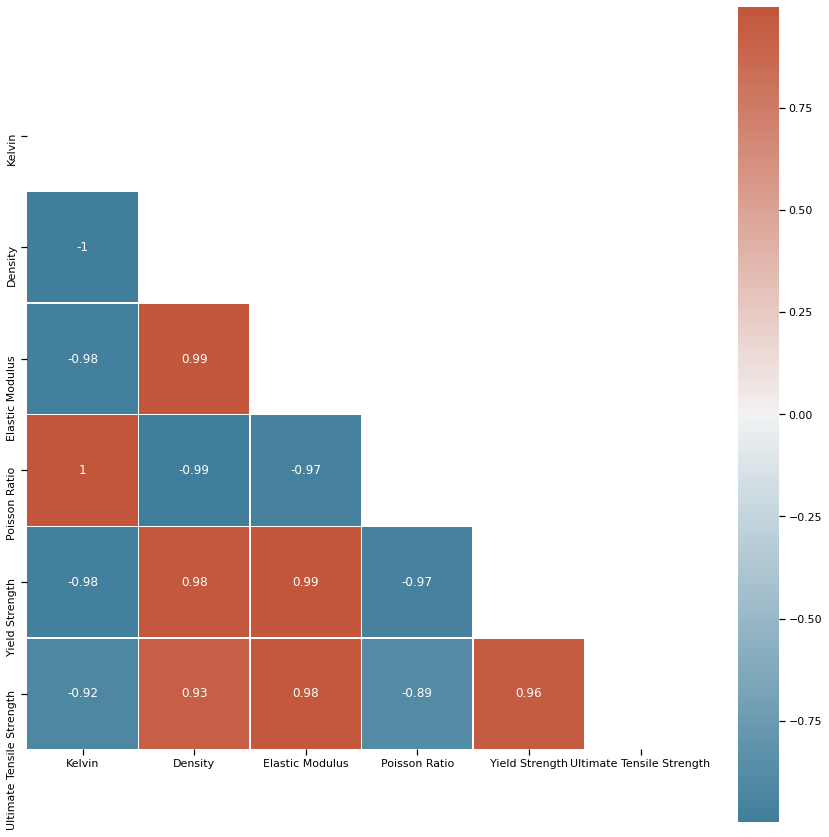

In [328]:
# Several hypothesis can be made about the data;
#     1. The bend in the Ultimate Tensile Strength curve is correlated to a change in density
#     2. The non-linear effects on the models is due to phase transformations in the material
#     3. Density effects are a direct correlation to temperature effects
# We can see very stronge correlation effects of each of the properties below some of which are inverse of the other feature
corr= db_Steel_Mech.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(15, 15))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, annot=True, linewidths=0.5, cmap=cmap, square=True)

In [ ]:
# The future steps for this EDA is to include all data from several materials science data bases to get a good understanding
# of each alloy type and try to infer temperature dependent relationships between these types of alloys and how they behave.
# I would say that this dataset is a little lacking in size to make good estimates on how it will work at proving these
# hypothesis but atleast shows areas of improvement for how data is collected, cleaned and process from each temperature 
# test it would be helpful it this code could scrape online vendor websites for what they post as their material properties
# that could provide a lot of free and managable trusted data to work with including the .xls file used today.